In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("regional_sales.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store_ID       54 non-null     object 
 1   Monthly_Sales  54 non-null     float64
dtypes: float64(1), object(1)
memory usage: 996.0+ bytes


In [ ]:
def plot_boxplot(df, iteration):
    """Plots a boxplot to visualize outliers."""
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df)
    plt.title(f"Boxplot - After Iteration {iteration}")
    plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    """Removes outliers using 1.5*IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered, df.shape[0] - df_filtered.shape[0]

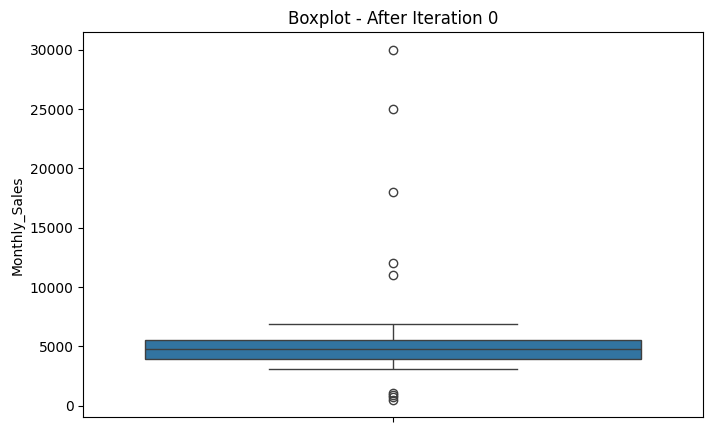

In [ ]:
# Initial boxplot
plot_boxplot(df, iteration=0)

Iteration 1: Removed 9 outliers.


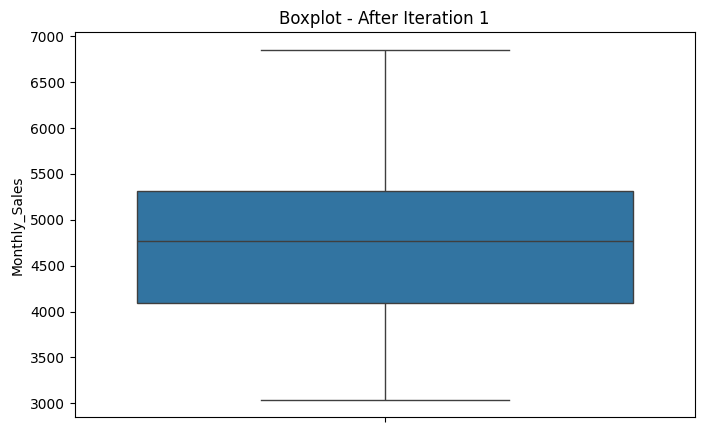

Iteration 2: Removed 0 outliers.


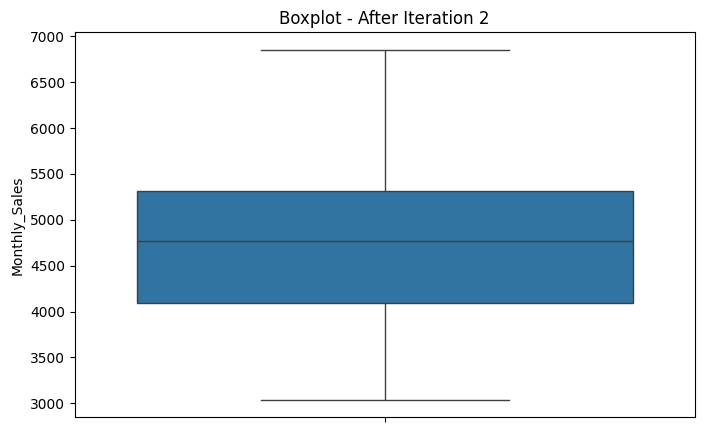

In [ ]:

# Apply IQR rule multiple times
iteration = 1
removed_outliers = -1  # Initialize with non-zero to enter loop

while removed_outliers != 0:  # Keep running until no more outliers are removed
    df, removed_outliers = remove_outliers_iqr(df, "Monthly_Sales")
    print(f"Iteration {iteration}: Removed {removed_outliers} outliers.")
    plot_boxplot(df, iteration)
    iteration += 1